### 1  Importation

In [342]:
import pandas as pd
import numpy as np
import pickle
import plotly.express as px

In [343]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


In [344]:
pip install tmdbv3api

Note: you may need to restart the kernel to use updated packages.


In [345]:
df_movies = pd.read_pickle("./data/fichier.pkl")
df_movies

,id,Titre,Original_title,Original_language,Production_companies,Production_countries,Release_date,Popularity,Budget,Overview,Runtime,Revenu,Spoken_languages,Tagline,Vote_average,Vote_count,Genres,Adult
0,2,Ariel,Ariel,fi,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",1988-10-21,20.997,0,Taisto Kasurinen is a Finnish coal miner whose...,73,0,"[[english_name, iso_639_1, name]]",,7.055,209,"[[id, name], [id, name], [id, name]]",False
1,3,Shadows in Paradise,Varjoja paratiisissa,fi,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",1986-10-17,15.827,0,"An episode in the life of Nikander, a garbage ...",74,0,"[[english_name, iso_639_1, name], [english_nam...",,7.245,204,"[[id, name], [id, name], [id, name]]",False
2,5,Four Rooms,Four Rooms,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1995-12-09,36.022,4000000,It's Ted the Bellhop's first night on the job....,98,4257354,"[[english_name, iso_639_1, name]]",Twelve outrageous guests. Four scandalous requ...,5.708,2268,"[[id, name], [id, name]]",False
3,6,Judgment Night,Judgment Night,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1993-10-15,19.026,21000000,"While racing to a boxing match, Frank, Mike, J...",109,12136938,"[[english_name, iso_639_1, name]]",Don't move. Don't whisper. Don't even breathe.,6.600,268,"[[id, name], [id, name], [id, name]]",False
4,8,Life in Loops (A Megacities RMX),Life in Loops (A Megacities RMX),en,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",2006-01-01,2.033,42000,Timo Novotny labels his new project an experim...,80,0,"[[english_name, iso_639_1, name], [english_nam...",A Megacities remix.,7.738,21,"[[id, name]]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,493,Shaft's Big Score!,Shaft's Big Score!,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1972-06-08,5.672,1978000,John Shaft is back as the lady-loved black det...,104,10000000,"[[english_name, iso_639_1, name]]",Last time he was nice. This time he's ice!,6.186,43,"[[id, name], [id, name], [id, name], [id, name]]",False
384,494,Shaft in Africa,Shaft in Africa,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1973-06-14,5.954,2142000,Detective John Shaft travels incognito to Ethi...,112,1458000,"[[english_name, iso_639_1, name]]",Shaft is stickin' it...all the way.,6.000,41,"[[id, name], [id, name], [id, name], [id, name...",False
385,496,Borat: Cultural Learnings of America for Make ...,Borat: Cultural Learnings of America for Make ...,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name], [iso_3166_1, name]]",2006-11-01,18.973,18000000,Kazakh journalist Borat Sagdiyev travels to Am...,84,262552893,"[[english_name, iso_639_1, name], [english_nam...","Come to Kazakhstan, it's nice!",6.739,4592,"[[id, name]]",False
386,497,The Green Mile,The Green Mile,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1999-12-10,74.257,60000000,A supernatural tale set on death row in a Sout...,189,286801374,"[[english_name, iso_639_1, name], [english_nam...",Miracles do happen.,8.509,14741,"[[id, name], [id, name], [id, name]]",False


### 2 Analyse descriptive

In [346]:
# Cleaning Genre : 
def traitement_genre(ligne_genre):
    genres = []
    for i in ligne_genre:
        genres.append(i["name"])    
    return genres

df_movies["genres"] = df_movies["Genres"].apply(traitement_genre)


# Cleaning Production_countries : 
def traitement_production_countries(ligne_pays):
    countries = []
    for type_pays  in ligne_pays:
        countries.append(type_pays["name"])    
    return countries

df_movies["production_countries"]= df_movies["Production_countries"].apply(traitement_production_countries)


# Cleaning Production_companies :
def traitement_production_companies(ligne_compagnie):
    companies = []
    for type_companies  in ligne_compagnie:
        companies.append(type_companies["name"])    
    return companies

df_movies["production_companies"]= df_movies["Production_companies"].apply(traitement_production_countries)
df_movies




,id,Titre,Original_title,Original_language,Production_companies,Production_countries,Release_date,Popularity,Budget,Overview,...,Revenu,Spoken_languages,Tagline,Vote_average,Vote_count,Genres,Adult,genres,production_countries,production_companies
0,2,Ariel,Ariel,fi,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",1988-10-21,20.997,0,Taisto Kasurinen is a Finnish coal miner whose...,...,0,"[[english_name, iso_639_1, name]]",,7.055,209,"[[id, name], [id, name], [id, name]]",False,"[Drama, Comedy, Crime]",[Finland],[Villealfa Filmproductions]
1,3,Shadows in Paradise,Varjoja paratiisissa,fi,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",1986-10-17,15.827,0,"An episode in the life of Nikander, a garbage ...",...,0,"[[english_name, iso_639_1, name], [english_nam...",,7.245,204,"[[id, name], [id, name], [id, name]]",False,"[Drama, Comedy, Romance]",[Finland],[Villealfa Filmproductions]
2,5,Four Rooms,Four Rooms,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1995-12-09,36.022,4000000,It's Ted the Bellhop's first night on the job....,...,4257354,"[[english_name, iso_639_1, name]]",Twelve outrageous guests. Four scandalous requ...,5.708,2268,"[[id, name], [id, name]]",False,"[Crime, Comedy]",[United States of America],"[Miramax, A Band Apart]"
3,6,Judgment Night,Judgment Night,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1993-10-15,19.026,21000000,"While racing to a boxing match, Frank, Mike, J...",...,12136938,"[[english_name, iso_639_1, name]]",Don't move. Don't whisper. Don't even breathe.,6.600,268,"[[id, name], [id, name], [id, name]]",False,"[Action, Crime, Thriller]",[United States of America],"[JVC, Largo Entertainment]"
4,8,Life in Loops (A Megacities RMX),Life in Loops (A Megacities RMX),en,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",2006-01-01,2.033,42000,Timo Novotny labels his new project an experim...,...,0,"[[english_name, iso_639_1, name], [english_nam...",A Megacities remix.,7.738,21,"[[id, name]]",False,[Documentary],[Austria],[inLoops]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,493,Shaft's Big Score!,Shaft's Big Score!,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1972-06-08,5.672,1978000,John Shaft is back as the lady-loved black det...,...,10000000,"[[english_name, iso_639_1, name]]",Last time he was nice. This time he's ice!,6.186,43,"[[id, name], [id, name], [id, name], [id, name]]",False,"[Action, Adventure, Crime, Mystery]",[United States of America],"[Metro-Goldwyn-Mayer, Shaft Productions]"
384,494,Shaft in Africa,Shaft in Africa,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1973-06-14,5.954,2142000,Detective John Shaft travels incognito to Ethi...,...,1458000,"[[english_name, iso_639_1, name]]",Shaft is stickin' it...all the way.,6.000,41,"[[id, name], [id, name], [id, name], [id, name...",False,"[Adventure, Action, Thriller, Crime, Mystery]",[United States of America],"[Metro-Goldwyn-Mayer, Shaft Productions]"
385,496,Borat: Cultural Learnings of America for Make ...,Borat: Cultural Learnings of America for Make ...,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name], [iso_3166_1, name]]",2006-11-01,18.973,18000000,Kazakh journalist Borat Sagdiyev travels to Am...,...,262552893,"[[english_name, iso_639_1, name], [english_nam...","Come to Kazakhstan, it's nice!",6.739,4592,"[[id, name]]",False,[Comedy],"[United Kingdom, United States of America]","[20th Century Fox, Dune Entertainment, Major S..."
386,497,The Green Mile,The Green Mile,en,"[[id, logo_path, name, origin_country], [id, l...","[[iso_3166_1, name]]",1999-12-10,74.257,60000000,A supernatural tale set on death row in a Sout...,...,286801374,"[[english_name, iso_639_1, name], [english_nam...",Miracles do happen.,8.509,14741,"[[id, name], [id, name], [id, name]]",False,"[Fantasy, Drama, Crime]",[Unit

In [347]:
df_movies.columns

Index(['id', 'Titre', 'Original_title', 'Original_language',
       'Production_companies', 'Production_countries', 'Release_date',
       'Popularity', 'Budget', 'Overview', 'Runtime', 'Revenu',
       'Spoken_languages', 'Tagline', 'Vote_average', 'Vote_count', 'Genres',
       'Adult', 'genres', 'production_countries', 'production_companies'],
      dtype='object')

In [348]:
# Remove column
df_movies=df_movies.drop(columns =['Tagline', 'Adult', 'Production_companies',"Production_countries","Genres"])

In [349]:
df_movies.columns

Index(['id', 'Titre', 'Original_title', 'Original_language', 'Release_date',
       'Popularity', 'Budget', 'Overview', 'Runtime', 'Revenu',
       'Spoken_languages', 'Vote_average', 'Vote_count', 'genres',
       'production_countries', 'production_companies'],
      dtype='object')

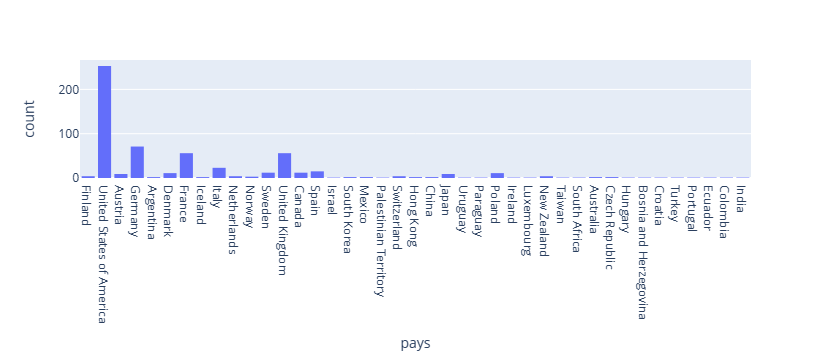

In [350]:
# The most represented countries
pays = df_movies["production_countries"]

acc_pays= []
for countries in range(len(pays)):
    acc_pays.extend(pays[countries])

colums=["pays"]
data=acc_pays

df_countries=pd.DataFrame(data=acc_pays, columns=colums)

px.histogram(df_countries, x="pays")

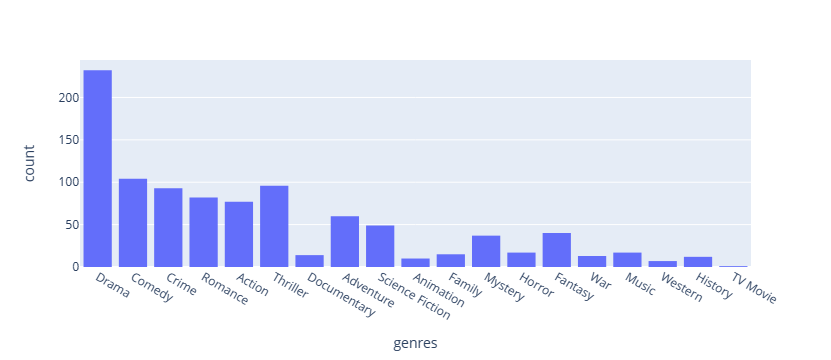

In [351]:
# The most represented genres
genres = df_movies["genres"]

acc_genres= []
for genre in range(len(genres)):
    acc_genres.extend(genres[genre])

colums=["genres"]
data=acc_genres

df_genres=pd.DataFrame(data=acc_genres, columns=colums)

px.histogram(df_genres, x="genres")

### 3 Modélisation